In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
import geopandas as gpn
import folium
init_notebook_mode(connected=True)
%matplotlib inline

In [163]:
# import Newcastle localised services data and uk-population figures from ONS
ncls = pd.read_csv('../data/raw/NewcastleCC_LocalisedServices.csv')
population = pd.read_csv('../data/raw/uk_population.csv')
postcode_columns = ['postcode', 'status', 'usertype', 'easting', 'northing', 'positional_quality_indicator', 'country',
                   'latitude', 'longitude', 'postcode_no_space', 'postcode_fixed_width_seven', 'postcode_fixed_width_eight'
                   'postcode_area', 'postcode_district', 'postcode_sector', 'outcode', 'incode']
postcodes = pd.read_csv('../data/raw/open_postcode_geo/open_postcode_geo.csv', names=postcode_columns, index_col=False)
la = pd.read_csv('../data/raw/postcode_LAcode.csv')
geos =pd.read_csv('../data/raw/geos.csv')

In [189]:
geos = pd.read_csv('../data/raw/geos.csv')

/Users/ahmed.salhin/anaconda3/envs/experiments/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning:

Columns (10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.



In [190]:
geos_columns = ['pcd7','lsoa', 'lsoaname']
geos = geos[geos_columns]

In [191]:
geosColumns = ['postcode_no_space', 'easting', 'northing','latitude', 'longitude']
postcodes_la = postcodes[geosColumns]
# postcodes_la.rename(columns={'postcode_no_space':'postcode'}, inplace=True)

In [193]:
geos = pd.merge(geos,postcodes_la,  left_on = 'pcd7', right_on='postcode_no_space')

In [136]:
# la.columns = [i.lstrip() for i in la.columns]
# laCode = la.drop(['old LA code'], axis=1)

In [137]:
# geos = pd.merge(geos,laCode, on='postcode')
# geos.rename(columns={'new LA code':'la_code'}, inplace=True)

In [194]:
# Joining ncls with population
lServ = pd.merge(ncls, population, left_on='SOA', right_on='Code')
lServ = lServ.drop(['SOA','Name'], axis=1)
lServ.rename(columns={"Code":"la_code"}, inplace=True)

In [197]:
geos.columns

Index(['pcd7', 'lsoa', 'lsoaname', 'postcode_no_space', 'easting', 'northing',
       'latitude', 'longitude'],
      dtype='object')

In [200]:
localService = pd.merge(lServ, geos, left_on='la_code',right_on ='lsoa')
dropColumns = ['la_code', 'pcd7']
localService = localService.drop(dropColumns, axis=1)

In [201]:
localService.to_csv('../data/interim/localService.csv')

[Text(0.5,0,'Service Category')]

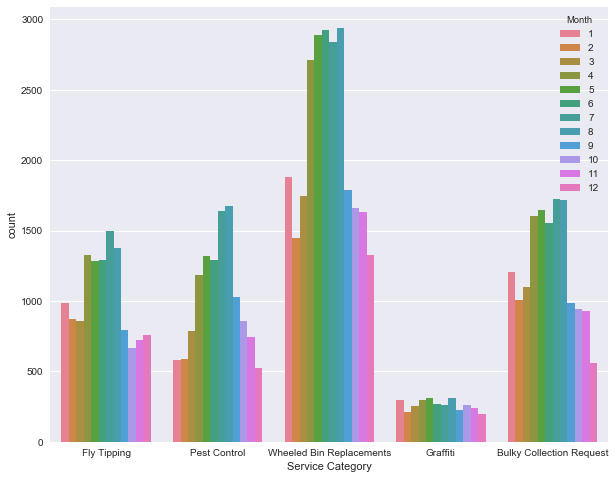

In [152]:
plt.figure(figsize=(10,8))
sns.set(style="darkgrid")
ca_count = sns.countplot(x ='Service_ca', data=lServ, hue = 'Month', palette = 'husl' )
ca_count.set(xlabel='Service Category')

In [202]:
localService

,Year,MonthName,Month,ISOWeekOfYear,Service_ca,Job_Descri,AREA,Distinct Count of enviroref,Mid-2016 Population,Area Sq Km,People per Sq Km,lsoa,lsoaname,postcode_no_space,easting,northing,latitude,longitude
0,2017,July,7,30,Fly Tipping,NON HAZARDOUS - SMALL REMOVAL,Newcastle upon Tyne 029D,14,"2,201",0.28,"7,847",E01008334,Newcastle upon Tyne 029D,NE156RR,421611,564202,54.971971,-1.663938
1,2017,July,7,30,Fly Tipping,NON HAZARDOUS - SMALL REMOVAL,Newcastle upon Tyne 029D,14,"2,201",0.28,"7,847",E01008334,Newcastle upon Tyne 029D,NE156PL,421651,564761,54.976992,-1.663271
2,2017,July,7,30,Fly Tipping,NON HAZARDOUS - SMALL REMOVAL,Newcastle upon Tyne 029D,14,"2,201",0.28,"7,847",E01008334,Newcastle upon Tyne 029D,NE156PQ,421793,564721,54.976627,-1.661056
3,2017,July,7,30,Fly Tipping,NON HAZARDOUS - SMALL REMOVAL,Newcastle upon Tyne 029D,14,"2,201",0.28,"7,847",E01008334,Newcastle upon Tyne 029D,NE156PR,421911,564690,54.976343,-1.659215
4,2017,July,7,30,Fly Tipping,NON HAZARDOUS - SMALL REMOVAL,Newcastle upon Tyne 029D,14,"2,201",0.28,"7,847",E01008334,Newcastle upon Tyne 029D,NE156PY,421482,564532,54.974948,-1.665942
5,2017,July,7,30,Fly Tipping,NON HAZARDOUS - SMALL REMOVAL,Newcastle upon Tyne 029D,14,"2,201",0.28,"7,847",E01008334,Newcastle upon Tyne 029D,NE156QE,421529,564672,54.976198,-1.665184
6,2017,July,7,30,Fly Tipping,NON HAZARDOUS - SMALL REMOVAL,Newcastle upon Tyne 029D,14,"2,201",0.28,"7,847",E01008334,Newcastle upon Tyne 029D,NE156QH,421564,564700,54.976448,-1.664635
7,2017,July,7,30,Fly Tipping,NON HAZARDOUS - SMALL REMOVAL,Newcastle upon Tyne 029D,14,"2,201",0.28,"7,847",E01008334,Newcastle upon Tyne 029D,NE156QJ,421624,564639,54.975904,-1.663716
8,2017,July,7,30,Fly Tipping,NON HAZARDOUS - SMALL REMOVAL,Newcastle upon Tyne 029D,14,"2,201",0.28,"7,847",E01008334,Newcastle upon Tyne 029D,NE156QL,421648,564599,54.975537,-1.663331
9,2017,July,7,30,Fly Tipping,NON HAZARDOUS - SMALL REMOVAL,Newcastle upon Tyne 029D,14,"2,201",0.28,"7,847",E01008334,Newcastle upon Tyne 029D,NE156QN,421666,564585,54.975410,-1.663050


In [57]:
folium.Map()